## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [4]:
data.shape

(804, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    float64
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    float64
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    float64
 9   Cruise    804 non-null    float64
 10  Sound     804 non-null    float64
 11  Leather   804 non-null    float64
dtypes: float64(8), object(4)
memory usage: 75.5+ KB


Самое простое предположение, чтобы было удобнее отобразить это посторить зависимости цены от пробега

In [6]:
X = data[ ['Mileage'] ]
Y = data['Price']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(normalize=True)

In [10]:
model.fit(X, Y)

LinearRegression(normalize=True)

In [11]:
y_predict = model.predict(X)

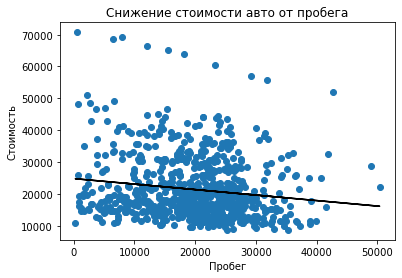

In [12]:
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.title("Снижение стоимости авто от пробега")
plt.xlabel("Пробег")
plt.ylabel("Стоимость")
plt.show()

### Задание слушателям

1. Выбрать самое дорогое авто и построить для него предсказание цены от пробега
2. Отобразить графически

In [13]:
data = data.sort_values('Price', ascending=False)
data.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466716,583.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0


In [14]:
data2 = data[ data.Model == 'XLR-V8' ]
data2

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466716,583.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
152,69133.731722,7892.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
151,68566.187189,6420.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
153,66374.307040,12021.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
154,65281.481237,15600.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
155,63913.117248,18200.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
156,60567.549093,23193.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
157,57154.443437,29260.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
158,55639.087654,31805.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,0.0,1.0
159,52001.994379,42691.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0


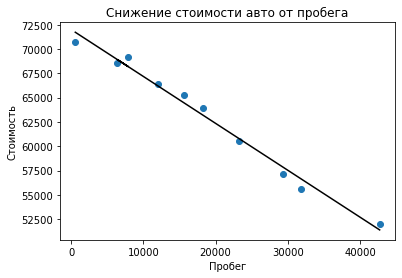

In [15]:
X = data2[ ['Mileage'] ]
Y = data2['Price']
model.fit(X, Y)
y_predict = model.predict(X)
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.title("Снижение стоимости авто от пробега")
plt.xlabel("Пробег")
plt.ylabel("Стоимость")
plt.show()

In [16]:
mean_squared_error(Y, y_predict)

507217.93670634367

In [17]:
mean_absolute_error(Y, y_predict)

650.4336100690409

In [18]:
model.coef_

array([-0.48268298])

#### Строим линейную регрессию по всему датафрейму

In [19]:
X = data.drop(['Price'], axis=1)


In [20]:
X = X.astype({'Make': 'category', 'Model': 'category', 'Trim': 'category', 'Type': 'category', 'Cylinder': 'category', 'Doors': 'category'})

In [21]:
make = pd.get_dummies(X['Make'])

In [22]:
X = pd.concat([X, make], axis=1)

In [23]:
Y = data['Price']

In [24]:
X = X.drop(['Make', 'Model', 'Trim','Type', 'Cylinder', 'Doors'], axis=1)


In [25]:
scaler.fit(X)
X = scaler.transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
model=LinearRegression(normalize=False)

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_predict_2 = model.predict(X_test)

In [30]:
# Коэффициент детерминации
model.score(X_test, y_test)

0.8785907551578545

In [31]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('Ср.абс.ош. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  12387009.698103175
Ср.абс.ош. =  2173.622573221232


## Нужно что-то получше!!!

### Задание

1. Улучшить модель

In [32]:
from sklearn.svm import LinearSVR

In [33]:
X_train

array([[-1.01058611,  0.69029267,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.3413491 ,  0.41876855,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.1935079 ,  0.41876855, -1.74361722, ..., -0.47891314,
        -0.40646942, -0.28398092],
       ...,
       [ 1.02671702,  0.69029267,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [ 0.19387414,  0.41876855,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [-1.6386976 , -0.66732794,  0.57352037, ..., -0.47891314,
         2.46020966, -0.28398092]])

In [34]:
model = LinearSVR(epsilon=0.1,C=100,max_iter=10000000).fit(X_train, y_train)

In [35]:
y_predict_2 = model.predict(X_test)

In [36]:
model.score(X_test, y_test)

0.8076738134839789

In [37]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('Ср.абс.ош. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  19622445.890925705
Ср.абс.ош. =  2465.786094659642


In [38]:
from statsmodels.formula.api import ols


In [39]:
data

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466716,583.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
152,69133.731722,7892.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
151,68566.187189,6420.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
153,66374.307040,12021.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
154,65281.481237,15600.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,9220.829677,29992.0,Chevrolet,AVEO,SVM Hatchback 4D,Hatchback,4.0,1.6,4.0,1.0,0.0,1.0
217,9041.906254,26191.0,Chevrolet,AVEO,SVM Sedan 4D,Sedan,4.0,1.6,4.0,0.0,0.0,1.0
218,8870.947316,32914.0,Chevrolet,AVEO,SVM Sedan 4D,Sedan,4.0,1.6,4.0,1.0,1.0,0.0
219,8768.998585,35299.0,Chevrolet,AVEO,SVM Sedan 4D,Sedan,4.0,1.6,4.0,0.0,0.0,0.0


In [44]:
!pip install category-encoders

In [45]:
from category_encoders.count import CountEncoder


In [46]:
X_train

array([[-1.01058611,  0.69029267,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.3413491 ,  0.41876855,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.1935079 ,  0.41876855, -1.74361722, ..., -0.47891314,
        -0.40646942, -0.28398092],
       ...,
       [ 1.02671702,  0.69029267,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [ 0.19387414,  0.41876855,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [-1.6386976 , -0.66732794,  0.57352037, ..., -0.47891314,
         2.46020966, -0.28398092]])

In [47]:
enc = CountEncoder(normalize=False).fit(X_train, y_train)

In [48]:
nd = enc.transform(X_train)

In [49]:
nd

,0,1,2,3,4,5,6,7,8,9,10
0,-1.010586,0.690293,0.573520,-1.454744,0.617611,-0.332411,-0.332411,-0.813116,2.088061,-0.406469,-0.283981
1,0.341349,0.418769,0.573520,0.687406,-1.619142,-0.332411,-0.332411,-0.813116,2.088061,-0.406469,-0.283981
2,0.193508,0.418769,-1.743617,0.687406,0.617611,-0.332411,-0.332411,1.229837,-0.478913,-0.406469,-0.283981
3,-0.172494,0.690293,0.573520,0.687406,0.617611,-0.332411,-0.332411,-0.813116,2.088061,-0.406469,-0.283981
4,0.848111,0.690293,0.573520,0.687406,-1.619142,3.008322,-0.332411,-0.813116,-0.478913,-0.406469,-0.283981
...,...,...,...,...,...,...,...,...,...,...,...
638,0.260531,1.414357,0.573520,-1.454744,0.617611,-0.332411,3.008322,-0.813116,-0.478913,-0.406469,-0.283981
639,-0.348780,-0.667328,0.573520,0.687406,0.617611,-0.332411,-0.332411,-0.813116,-0.478913,2.460210,-0.283981
640,1.026717,0.690293,0.573520,0.687406,0.617611,-0.332411,-0.332411,1.229837,-0.478913,-0.406469,-0.283981
641,0.193874,0.418769,0.573520,0.687406,0.617611,-0.332411,-0.332411,1.229837,-0.478913,-0.406469,-0.283981
